In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
from task2a import pre_process_images
from trainer import BaseTrainer
from task3a import cross_entropy_loss, SoftmaxModel, one_hot_encode
from task3 import SoftmaxTrainer
np.random.seed(0)

In [31]:

# hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
num_epochs = 50
learning_rate = 0.01
batch_size = 128
l2_reg_lambda = 0
shuffle_dataset = True

# Load dataset
X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
X_train = pre_process_images(X_train)
X_val = pre_process_images(X_val)
Y_train = one_hot_encode(Y_train, 10)
Y_val = one_hot_encode(Y_val, 10)

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)


Early stopping at epoch 961
Early stopping at epoch 2356
Early stopping at epoch 5518
Early stopping at epoch 7750


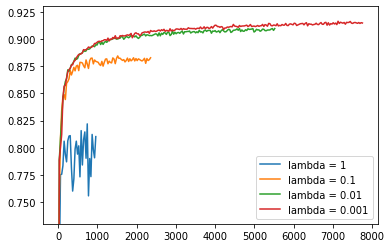

In [34]:
# Plotting of accuracy for difference values of lambdas (task 4c)
l2_lambdas = [1, .1, .01, .001]

l2_norms = []
for l2_lambda in l2_lambdas:
    model = SoftmaxModel(l2_reg_lambda=l2_lambda)
    trainer = SoftmaxTrainer(
        model, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)
    utils.plot_loss(val_history["accuracy"], f"lambda = {l2_lambda}")
    l2_norms.append(np.linalg.norm(model.w))
plt.ylim([0.73, 0.93])
plt.legend()
plt.show()

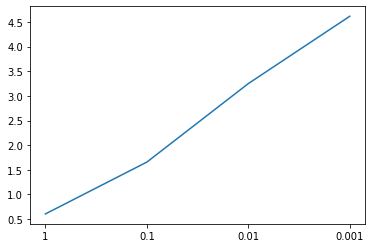

In [38]:
# Task 4d - Plotting of the l2 norm for each weight
plt.plot(l2_norms)
plt.xticks(np.arange(len(l2_lambdas)), l2_lambdas)
plt.savefig("task4d_l2_reg_norms.png")